In [1]:
import os,json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.draw import polygon

In [2]:
class2id = {'PLACENTA':1, 'BLADDER':2,'UTERUS':3}

img_local_dir ='deidentified_ctl/'
source = 'msks_raw/'
target = 'msks/'
missing_list = []

def json2png(json_raw, img):
    num_organ = len(json_raw['shapes'])
    msk_out = np.zeros_like(img)
    for i in range(num_organ):
        organ_vertex = np.array(json_raw['shapes'][i]['points']).round()
        rr, cc = polygon(organ_vertex[:,1], organ_vertex[:,0], msk_out.shape)
        msk_out[rr,cc] = class2id[json_raw['shapes'][i]['label']]
    return msk_out


for filename in os.listdir(source):
    if not os.path.exists(img_local_dir+ filename[:-5]+'.png'):
        missing_list.append(filename)
        continue
        
    with open(source + filename) as json_file:
        data_json = json.load(json_file)
        dest = target + data_json['imagePath']
        img_source = img_local_dir + data_json['imagePath'][:-4]+'.png'
        
        image = np.array(Image.open(img_source).convert('L')).astype('uint8')
        gt_msk = json2png(data_json,image)
        Image.fromarray(gt_msk).save(dest[:-4]+'.png')
#             plt.figure(dpi=400)
#             plt.imshow(np.concatenate((image,gt_msk*80),axis=1),cmap='gray')
#             plt.show()

KeyError: 'placenta'

In [2]:
# class2id = {'PLACENTA':1, 'BLADDER':2, 'UTERUS':3}
class2id = {'placenta':1, 'bladder':2, 'uterus':3}
img_local_dir ='deidentified_ctl/'
source = 'msks_raw/'
target = 'msks/'
missing_list = []

def json2png(json_raw, img):
    num_organ = len(json_raw['shapes'])
    msk_out = np.zeros_like(img)
    for i in range(num_organ):
        organ_vertex = np.array(json_raw['shapes'][i]['points']).round()
        rr, cc = polygon(organ_vertex[:,1], organ_vertex[:,0], msk_out.shape)
        msk_out[rr,cc] = class2id[json_raw['shapes'][i]['label']]
    return msk_out


for filename in os.listdir(source):
    if not os.path.exists(img_local_dir+ filename[:-5]+'.png'):
        missing_list.append(filename)
        continue
        
    with open(source + filename) as json_file:
        data_json = json.load(json_file)
        dest = target + data_json['imagePath']
        img_source = img_local_dir + data_json['imagePath'][:-4]+'.png'
#         assert False
        image = np.array(Image.open(img_source).convert('L')).astype('uint8')
        gt_msk = json2png(data_json,image)
        Image.fromarray(gt_msk).save(dest[:-4]+'.png')
#             plt.figure(dpi=400)
#             plt.imshow(np.concatenate((image,gt_msk*80),axis=1),cmap='gray')
#             plt.show()

In [10]:

len(os.listdir('msks_raw/'))-len(missing_list)

98

In [3]:
'deidentified_img/'+ filename[:-5]+'.png'

'deidentified_img/Subject_23_1_2.png'

In [6]:
os.listdir('deidentified_img/')

['Subject_99_24_58.tif',
 'Subject_11_3_19.tif',
 'Subject_9_21.tif',
 'Subject_13_1_27.tif',
 'Subject_17_1_16.tif',
 'Subject_99_25_3.tif',
 'Subject_11_3_11.tif',
 'Subject_15_1_23.tif',
 'Subject_11_3_6.tif',
 'Subject_11_2_11.tif',
 'Subject_9_15.tif',
 'Subject_12_1_20.tif',
 'Subject_11_3_37.tif',
 'Subject_99_1.tif',
 'Subject_99_24_50.tif',
 'Subject_18_2_7.tif',
 'Subject_05_4.tif',
 'Subject_9_31.tif',
 'Subject_11_2_10.tif',
 'Subject_9_9.tif',
 'Subject_11_5_21.tif',
 'Subject_13_1_25.tif',
 'Subject_11_4_22.tif',
 'Subject_13_1_18.tif',
 'Subject_14_2_2.tif',
 'Subject_9_13.tif',
 'Subject_13_1_23.tif',
 'Subject_15_1_21.tif',
 'Subject_99_24_9.tif',
 'Subject_11_3_5.tif',
 'Subject_99_19.tif',
 'Subject_14_1_7.tif',
 'Subject_13_1_22.tif',
 'Subject_15_1_18.tif',
 'Subject_99_24_38.tif',
 'Subject_15_1_29.tif',
 'Subject_12_1_7.tif',
 'Subject_11_1_10.tif',
 'Subject_16_1_7.tif',
 'Subject_9_14.tif',
 'Subject_16_1_1.tif',
 'Subject_18_2_3.tif',
 'Subject_99_24_95.tif',


In [3]:
len(missing_list)

0

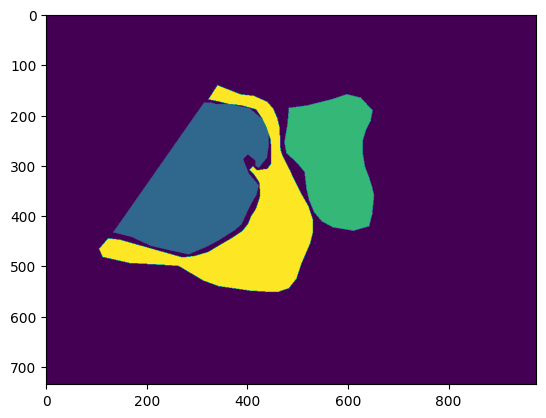

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = np.array(Image.open('/data/LAIPAS_Images/msks/Subject_11_3_13.png'))
plt.imshow(img)
plt.show()


In [32]:
import os,cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
temp = []
for filename in os.listdir('/data/LAIPAS_Images/img_source/'):
#     filename='Subject_99_24_28.tif'
    img = np.array(Image.open('/data/LAIPAS_Images/img_source/'+filename).convert('L'))
    print(img.dtype)
    assert False
    h,w = img.shape[:2]
    if h > 800:
        img[:65] = 0
        img = cv2.resize(img,(960,720), interpolation=cv2.INTER_AREA)
    else:
        img[:70] = 0
    
    cv2.imwrite('/data/LAIPAS_Images/img_clean/'+filename[:-4]+'.png', img)
    

uint8


AssertionError: 